In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_fuml_salary_17-18')

In [3]:
wrs.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
wrs.head()

,NAME,FUML,FUML_rank,salary
0,Antonio Brown,0,54.0,17000000
1,Phillip Dorsett,0,54.0,2033854
2,Jaron Brown,0,54.0,1910000
3,Zay Jones,0,54.0,1694958
4,Brice Butler,0,54.0,1100000


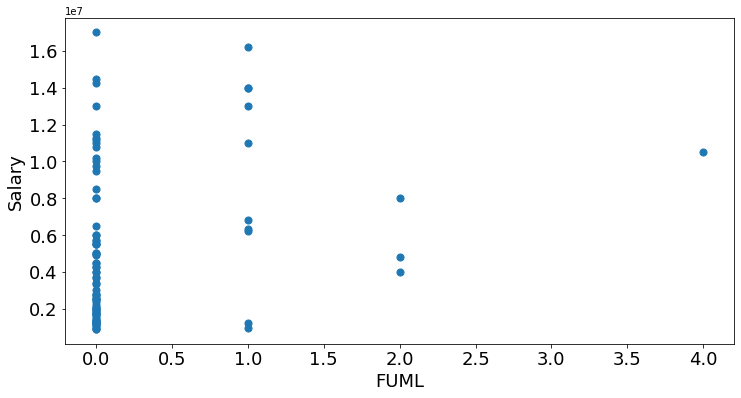

In [5]:
ax = wrs.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([-3.06268421e-17, -2.04178947e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.37100707, -0.56385004],
       [ 1.2428737 ,  1.97228047],
       [ 1.84807899, -0.12885586],
       [-0.37100707,  1.38015484],
       [ 6.08451602,  1.22641932]])

In [11]:
km.predict(X)

array([3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 3, 3, 3, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Antonio Brown,0,54.0,17000000,3
1,Phillip Dorsett,0,54.0,2033854,0
2,Jaron Brown,0,54.0,1910000,0
3,Zay Jones,0,54.0,1694958,0
4,Brice Butler,0,54.0,1100000,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[-1.38777878e-16,  2.96314712e+06],
       [ 1.00000000e+00,  1.36400000e+07],
       [ 1.37500000e+00,  4.79442862e+06],
       [-2.77555756e-17,  1.11472110e+07],
       [ 4.00000000e+00,  1.05000000e+07]])

In [14]:
wrs.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,0.000,2.963147e+06
1,1.000,1.364000e+07
2,1.375,4.794429e+06
3,0.000,1.114721e+07
4,4.000,1.050000e+07


In [15]:
centroids = wrs.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

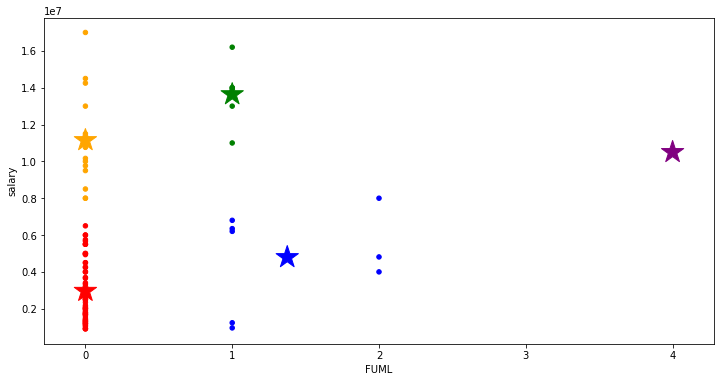

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

22.198190206050263

In [18]:
silhouette_score(X, km.labels_)

0.6665456633074549